# Seine water quality is shitty...

Sources:
- [World Triathlon rules](https://www.triathlon.org/uploads/docs/World-Triathlon_Competition-Rules_2024_20240416.pdf): Escherichia coli E. Coli not more than 500 per 100 ml (cfu/100ml) for inland water from the rules published in april 2024.
- [Fluidion open data initiative](https://fluidion.com/open-data-initiative/2024-seine-water-quality) for the measurements. 

The disclaimer and  Copyright Notice is the following:

    "The water quality data shown on this page are collected and presented by Fluidion as a best efforts attempt to provide accurate- timely- and accessible information about the Seine River quality in the run-up and during the Olympic events. It combines samples collected by Fluidion personnel and by trained citizen scientists- under Fluidion oversight. Samples are collected in the Seine at the Alexandre III bridge in Paris- which is the 2024 Olympic venue.
    The data presented here are quality controlled by Fluidion scientists- which may introduce delays in the data availability. Any errors in the data are accidental- and whenever detected- they are corrected immediately.
    All data presented on this page belong to Fluidion and are protected by copyright. Any use of the data must provide a clear reference to this website and include the following text: "Data provided courtesy of the Fluidion Open Data Initiative".

In [1]:
%load_ext jupyter_black
import pandas as pd
import matplotlib.pyplot as plt
import calmap

plt.style.use("ggplot")

In [7]:
# Download the data directly from the source of the Fluidion Open Data Initiative:
df = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/e/2PACX-1vRIcAtF6kic-tiogipgl87a92dClA5vNhkppPY64yRlu5DlzRQKor5aZnFZnCWpTJzsVqeK8tR0UToQ/pub?gid=0&single=true&output=csv",
    header=3,
    index_col=0,
    parse_dates=True,
)
# Save a csv file in case
df.to_csv("data/Fluidion_data.csv")
df.tail()

,Laboratory E.coli MPN/100mL (IDEXX),Planktonic E.coli/100mL (ALERT),Comprehensive E.coli/100mL (ALERT)
Date,,,
2024-07-30,687.0,867.0,3444.0
2024-07-31,435.0,666.0,2203.0
2024-08-01,2590.0,1592.0,5173.0
2024-08-02,NaN,NaN,NaN
2024-08-03,NaN,NaN,NaN


In [3]:
World_triathlon_limit = 500  # [World Triathlon rules](https://www.triathlon.org/uploads/docs/World-Triathlon_Competition-Rules_2024_20240416.pdf)

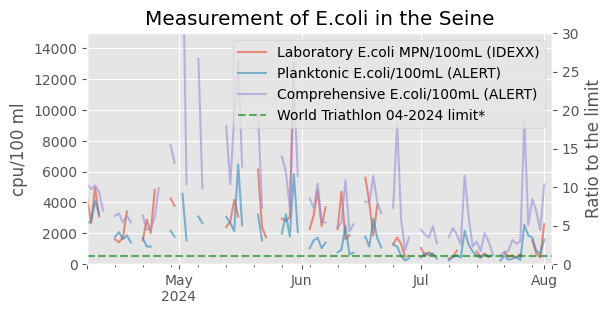

In [6]:
fig, ax = plt.subplots(figsize=(6, 3))
ax2 = ax.twinx()
ax2.grid(False)
df.plot(ax=ax, alpha=0.6)
ax.set_ylabel("cpu/100 ml")
ax.set_xlabel("")
ax.axhline(
    y=World_triathlon_limit,
    ls="--",
    c="green",
    label="World Triathlon 04-2024 limit*",
    alpha=0.6,
)
ax.set_ylim([0, 15000])
ax2.set_ylim(
    [ax.get_ylim()[0] / World_triathlon_limit, ax.get_ylim()[1] / World_triathlon_limit]
)
ax2.set_ylabel("Ratio to the limit")
plt.title("Measurement of E.coli in the Seine")
ax.legend()
plt.savefig("plot/time_series.png", bbox_inches="tight")

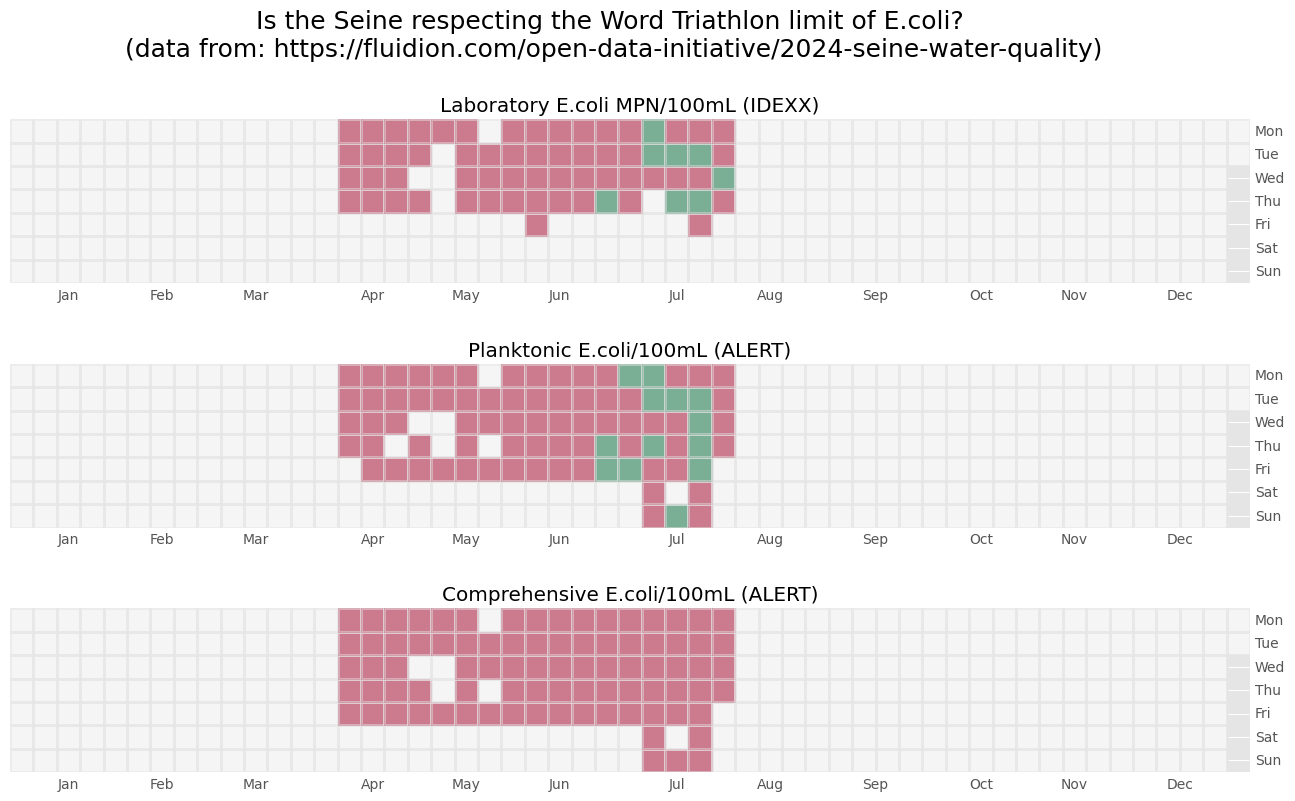

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(16, 9))
for i, col in enumerate(df.columns):
    calmap.yearplot(
        df[col].dropna() <= World_triathlon_limit, ax=ax[i], cmap="RdYlGn", alpha=0.5
    )
    # calmap.yearplot(df[col].dropna() > limit, ax=ax[i], cmap="Reds", alpha=0.5)
    ax[i].set_title(col)
plt.suptitle(
    "Is the Seine respecting the Word Triathlon limit of E.coli?\n (data from: https://fluidion.com/open-data-initiative/2024-seine-water-quality)",
    fontsize=18,
)
plt.savefig("plot/calmap.png", bbox_inches="tight")